# Data Analysis-Local Church
## This is a gender analysis of people serving at a local church in different areas

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [35]:
church_data = pd.read_csv('Data_church_service.csv')

In [36]:
church_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                711 non-null    int64 
 1   Gender                    540 non-null    object
 2   Servicio :: Sirviendo en  97 non-null     object
dtypes: int64(1), object(2)
memory usage: 16.8+ KB


In [37]:
church_data.head()

,Unnamed: 0,Gender,Servicio :: Sirviendo en
0,0,M,NaN
1,1,M,NaN
2,2,F,NaN
3,3,M,Música
4,4,M,NaN


### Data Cleaning

In [38]:
church_data.columns = ['Index', 'Gender', 'Service']

In [39]:
church_data.head()

,Index,Gender,Service
0,0,M,NaN
1,1,M,NaN
2,2,F,NaN
3,3,M,Música
4,4,M,NaN


In [40]:
church_data = church_data[['Gender', 'Service']]

In [41]:
print(len(church_data))

711


In [42]:
church_data.isna().any()

Gender     True
Service    True
dtype: bool

#### Keep only data of people actually serving at the local church

In [43]:
clean_church_data = church_data.dropna()

In [44]:
clean_church_data.isna().any()

Gender     False
Service    False
dtype: bool

How many people are serving at church according to the list?

In [45]:
print(len(clean_church_data))

75


### Women serving at church

In [46]:
women_church = clean_church_data[clean_church_data['Gender'] == 'F']

In [47]:
women_church.reset_index(drop=True).head()

,Gender,Service
0,F,Multimedia/Sonido
1,F,Música
2,F,Líder de Grupo
3,F,Mujeres Conexión
4,F,Vertical Kids


How many women at serving at the local church?

In [48]:
print(len(women_church))

42


In how many different areas are women serving?

In [49]:
women_service = women_church['Service'].unique()
len(women_service)

22

How many women are per area of service?

In [50]:
women_serv_counts = women_church['Service'].value_counts(normalize=False)
print(women_serv_counts)

Vertical Kids                                          7
Anfitriones                                            6
Cafetería;Vertical Kids                                3
Uno+                                                   3
Música                                                 3
 Líder de Grupo                                        2
Jovenes Conexión                                       2
 Líder de Grupo;Mujeres Conexión                       2
Multimedia/Sonido                                      1
Anfitriones;Cafetería;Jovenes Conexión                 1
Jovenes Conexión;Vertical Kids;Team Creativo           1
 Líder de Grupo;Música;Vertical Kids                   1
Cafetería;Jovenes Conexión;Música;Vertical Kids        1
 Líder de Grupo;Cafetería;Comunidad Vertical           1
Administración                                         1
Administración; Líder de Grupo;Mujeres Conexión        1
Administración; Líder de Grupo;Música;Vertical Kids    1
 Líder de Grupo;Música         

Note: Data in the service column is joined with semicolons 

In [51]:
split_service_women = women_church['Service'].str.split(';', expand=True)

In [52]:
split_service_women.reset_index(drop=True).head()

,0,1,2,3
0,Multimedia/Sonido,None,None,None
1,Música,None,None,None
2,Líder de Grupo,None,None,None
3,Mujeres Conexión,None,None,None
4,Vertical Kids,None,None,None


### Count again areas of service with split columns

In [53]:
count_split_service_women = split_service_women.apply(pd.value_counts)

In [54]:
count_split_service_women.head()

,0,1,2,3
Líder de Grupo,8.0,2.0,NaN,NaN
Administración,3.0,NaN,NaN,NaN
Anfitriones,9.0,NaN,NaN,NaN
Cafetería,4.0,4.0,NaN,NaN
Comunidad Vertical,NaN,NaN,1.0,NaN


Replace NaN with zeroes for addition

In [55]:
zero_split_service_women = count_split_service_women.replace(np.nan, 0)

In [56]:
zero_split_service_women.head()

,0,1,2,3
Líder de Grupo,8.0,2.0,0.0,0.0
Administración,3.0,0.0,0.0,0.0
Anfitriones,9.0,0.0,0.0,0.0
Cafetería,4.0,4.0,0.0,0.0
Comunidad Vertical,0.0,0.0,1.0,0.0


In [57]:
sum_split_service_women = zero_split_service_women[0] + zero_split_service_women[1] + zero_split_service_women[2] + zero_split_service_women[3]
print(sum_split_service_women)

 Líder de Grupo       10.0
Administración         3.0
Anfitriones            9.0
Cafetería              8.0
Comunidad Vertical     1.0
Jovenes Conexión       5.0
Mujeres Conexión       4.0
Multimedia/Sonido      1.0
Música                 7.0
Team Creativo          2.0
Uno+                   3.0
Vertical Kids         15.0
dtype: float64


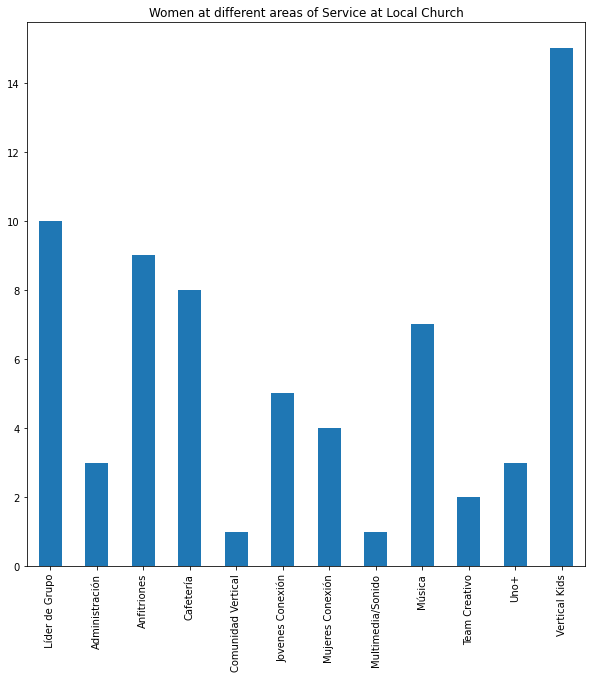

<Figure size 432x288 with 0 Axes>

In [60]:
# Still have to check it
plt.figure(figsize=(10, 10))
sum_split_service_women.plot(kind = 'bar')
plt.title('Women at different areas of Service at Local Church')
plt.show()
plt.savefig('test.png', bbox_inches='tight')